# Funciones de Pérdida

### Funciones de Pérdida de Regresión

Vamos a comparar cómo diferentes funciones de pérdida afectan al rendimiento de un modelo `SGDRegressor` entrenado en el conjunto de datos anterior.

Las funciones de pérdida que vamos a analizar son:


1. **L2**:
    - La pérdida cuadrática penaliza los errores grandes mucho más que los pequeños debido al término cuadrático.
    - Fórmula:
    $$
    \mathcal{L}(y, \hat{y}) = || y^{(i)} - \hat{y}^{(i)} ||_2^2 =  \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
    $$

2. **L1**:
    - Comparada con la L2,  penaliza menos los errores grandes (linealmente) y penaliza más los errores pequeños.
    - Fórmula:
    $$
    \mathcal{L}(y, \hat{y}) = || y^{(i)} - \hat{y}^{(i)} ||_1 =  \sum_{i=1}^{m} |y^{(i)} - \hat{y}^{(i)}|
    $$

   
3. **Huber**:
    - Combina la L2 y L1, utilizando L2 para errores pequeños y L1 para errores grandes.
    - Fórmula:
    $$
    \mathcal{L}(y, \hat{y}) =
    \begin{cases}
    \frac{1}{2}(y - \hat{y})^2 & \text{si } |y - \hat{y}| \leq \delta \\
    \delta |y - \hat{y}| - \frac{1}{2}\delta^2 & \text{si } |y - \hat{y}| > \delta
    \end{cases}
    $$

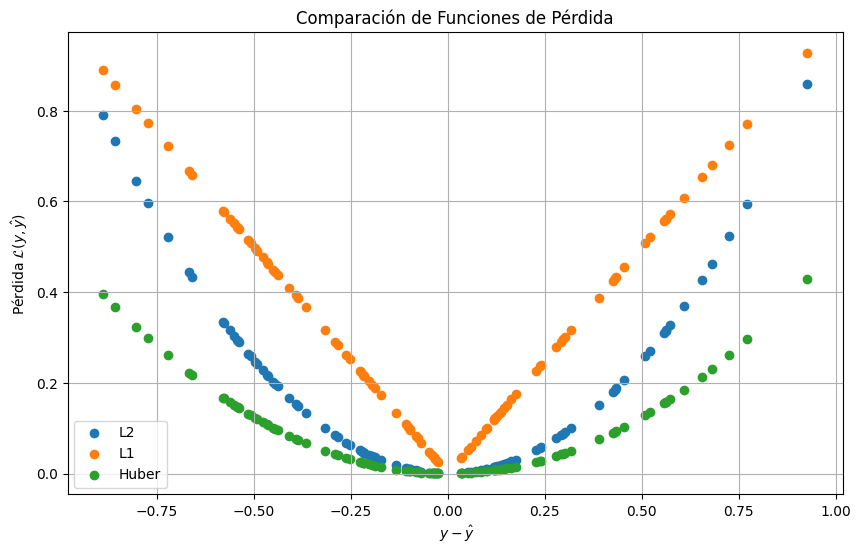

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#################################### COMPLETAR ####################################
# Define la pérdida L2
def l2loss(y_true, y_pred):
    return (y_true - y_pred) ** 2

#################################### COMPLETAR ####################################
# Define la pérdida L1
def l1loss(y_true, y_pred):
    return np.abs(y_true - y_pred)

#################################### COMPLETAR ####################################
# Define la pérdida Uber
def huber_loss(y_true, y_pred, delta=1.0):
    abs_diff = np.abs(y_true - y_pred)
    return np.where(abs_diff <= delta, 0.5 * abs_diff ** 2, delta * (abs_diff - 0.5 * delta))

#################################### COMPLETAR ####################################


#################################### COMPLETAR ####################################
# Da valores de ejemplo para y_true y y_pred
y_true = np.random.rand(100)
y_pred = np.random.rand(100)

#################################### COMPLETAR ####################################
# Calcula las pérdidas para cada función
l2loss_v = l2loss(y_true, y_pred)
l1loss_v = l1loss(y_true, y_pred)
huber_loss_v = huber_loss(y_true, y_pred)

#################################### COMPLETAR ####################################
# Visualiza los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_true - y_pred, l2loss_v, label='L2')
plt.scatter(y_true - y_pred, l1loss_v, label='L1')
plt.scatter(y_true - y_pred, huber_loss_v, label='Huber')

plt.xlabel(" $y - \hat{y}$")
plt.ylabel("Pérdida $\mathcal{L}(y, \hat{y})$")
plt.title("Comparación de Funciones de Pérdida")
plt.legend()
plt.grid(True)
plt.show()

### Funciones de Pérdida de Clasificación

1. **Pérdida Logística**:
   - Utilizada en problemas de clasificación probabilística. Penaliza más las predicciones erróneas confiadas.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y}) = y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})
   $$

2. **Hinge**:
   - Utilizada en SVM, penaliza predicciones incorrectas dentro del margen.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y})=  \max(0, 1 - y \cdot \hat{y})
   $$

3. **Perceptron Loss**:
   - Penaliza predicciones incorrectas sin margen.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y})=  \max(0, -y \cdot \hat{y})
   $$

4. **Binomial**:
   - Similar a la logística. Penaliza las predicciones basadas en la desviación binomial entre las probabilidades reales y predichas.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y}) = \log\left(1 + \exp(-y \cdot \hat{y})\right)
   $$

6. **Pérdida Exponencial**:
   - Penaliza fuertemente los errores grandes.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y}) =\exp(-y \cdot \hat{y})
   $$

[-1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1  1
 -1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1
 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1
  1 -1 -1 -1] [-5.86038413e-01  4.44968268e-01 -3.66839368e-01  7.36595751e-01
  4.45447709e-02 -2.46887660e-01 -9.61536836e-01  7.36778852e-02
  6.55531597e-01 -1.79901982e-02  9.23009339e-01  1.00253022e-02
 -8.25231464e-01 -5.54720371e-01 -4.24280343e-01  1.90917824e-01
  2.11500039e-01  8.87154516e-01 -2.42789818e-02  3.09190708e-01
  2.26000464e-02 -3.57389038e-01 -4.32382077e-01  7.60170643e-01
  7.61688580e-01 -4.61273876e-01 -2.04506517e-01  1.06692814e-01
 -4.36044603e-01  8.18993364e-02  8.01130200e-01  9.01343538e-01
  2.97462143e-01  9.31188661e-01 -7.62233453e-01  1.71381129e-01
 -8.16201743e-01  5.37566838e-01  4.29520057e-01 -1.10996817e-01
  2.08143826e-01  1.62043673e-01 -2.63197875

<ipython-input-4-eaec7d6edefe>:4: RuntimeWarning: invalid value encountered in log
  return -(np.multiply(y_true, np.log(y_pred))  + np.multiply((1-y_true) , np.log(1-y_pred)))


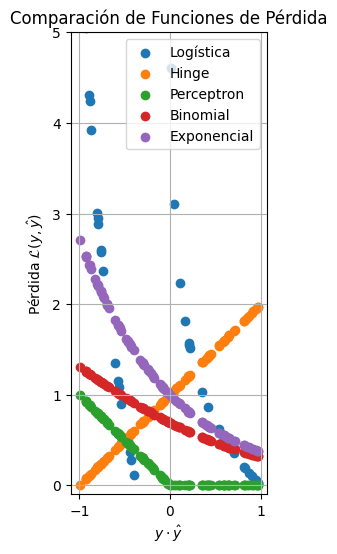

In [4]:
#################################### COMPLETAR ####################################
# Define la pérdida Logística
def logloss(y_true, y_pred):
  return -(np.multiply(y_true, np.log(y_pred))  + np.multiply((1-y_true) , np.log(1-y_pred)))

#################################### COMPLETAR ####################################
# Define la pérdida Hinge
def hingeloss(y_true, y_pred):
  prod= np.multiply(-y_true, y_pred)
  return np.maximum(0,1-prod)

#################################### COMPLETAR ####################################
# Define la pérdida Perceptrón
def perceptronloss(y_true, y_pred):
  return np.maximum(0, np.multiply(-y_true, y_pred))

#################################### COMPLETAR ####################################
# Define la pérdida Binomial
def binomialloss(y_true, y_pred):
  return np.log(1+ np.exp(np.multiply(-y_true, y_pred)))

#################################### COMPLETAR ####################################
# Define la pérdida Exponencial
def exploss(y_true, y_pred):
  return np.exp(np.multiply(-y_true, y_pred))

#################################### COMPLETAR ####################################
# Da valores de ejemplo para y_true y y_pred
y_true = np.random.choice([-1, 1], size=100)
y_pred = np.random.uniform(-1, 1, size=100)


print(y_true, y_pred)
#################################### COMPLETAR ####################################
# Calcula las pérdidas para cada función
logloss_v = logloss(y_true, y_pred)
hingeloss_v = hingeloss(y_true, y_pred)
perceptronloss_v = perceptronloss(y_true, y_pred)
binomialloss_v = binomialloss(y_true, y_pred)
exploss_v = exploss(y_true, y_pred)

#################################### COMPLETAR ####################################
# Visualiza los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_true*y_pred, logloss_v, label='Logística')
plt.scatter(y_true*y_pred, hingeloss_v, label='Hinge')
plt.scatter(y_true*y_pred, perceptronloss_v, label='Perceptron')
plt.scatter(y_true*y_pred, binomialloss_v, label='Binomial')
plt.scatter(y_true*y_pred, exploss_v, label='Exponencial')

# Configuración del gráfico
plt.xlabel("$y \cdot\hat{y}$")
plt.ylabel("Pérdida $\mathcal{L}(y, \hat{y})$")
plt.title("Comparación de Funciones de Pérdida")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.ylim([-0.1,5])
plt.show()

### Comparación de Funciones de Pérdida en `SGDRegressor`

Vamos a comparar cómo diferentes funciones de pérdida afectan al rendimiento de un modelo `SGDRegressor` entrenado en el conjunto de datos anterior.


Comenzamos generando datos. Crea unos datos ruidosos a partir de la siguiente función:
$$
y = 2x +1 \eta, \quad \eta \sim \mathcal{N}(0,1),
$$
y, además, añade algunos *outliers* al conjunto de puntos generado.

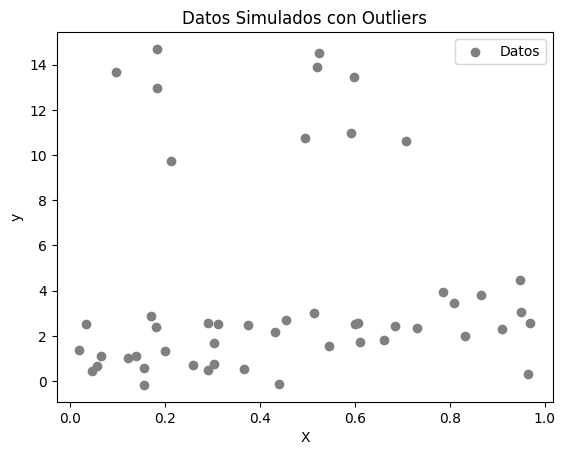

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#################################### COMPLETAR ####################################
# Generar datos
np.random.seed(42)

n_samples=50
X = np.random.rand(n_samples, 1)
noise= np.random.normal(0, 1, (n_samples, 1))

y = 2 * X + 1+ noise

#################################### COMPLETAR ####################################
# Introducir algunos outliers
n_outliers = 10

# Seleccionar índices aleatorios para los outliers
outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)

# Introducir outliers modificando los valores de y en esos índices
# Por ejemplo, sumando un valor grande para crear outliers
y[outlier_indices] += np.random.normal(10, 2, (n_outliers, 1))  # Desviación grande para outliers

#################################### COMPLETAR ####################################
# Visualizar
plt.scatter(X, y, color='gray', label='Datos')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos Simulados con Outliers")
plt.legend()
plt.show()

Ahora, importa `SGRegressor` y ajusta los datos anteriores utilizando distintas funciones de pérdida predeterminadas.

In [ ]:
#################################### COMPLETAR ####################################
# Importa SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


#################################### COMPLETAR ####################################
# Entrena varios modelos con los datos anteriores usando distintas funciones

# Lista de funciones de pérdida para probar





InvalidParameterError: The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead.

<div style="background-color: lightblue; padding: 10px; border-radius: 5px; font-style: italic;">
  ¿Qué puedes concluir de los modelos resultantes?
</div>